<a href="https://colab.research.google.com/github/davidGCR/ViolenceModels/blob/master/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/VIOLENCE DATASETS/CIFAR"

cifar-10-batches-py  cifar-10-python.tar.gz


In [0]:
import torch
import torchvision
# import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import glob
import cv2
from PIL import Image
from torch.utils.data import Dataset
from torchvision import models
import torch
from torchvision import transforms
from PIL import Image
from torch.autograd import Variable

## TEST CLASSIFIER

In [0]:
folder = '/content/drive/My Drive/VIOLENCE DATASETS/CIFAR'
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=folder, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=folder, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


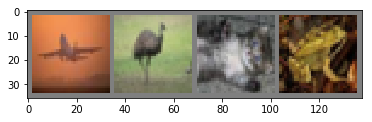

plane  bird   cat  frog


In [0]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
class Net(nn.Module):
  def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(3, 6, 5)
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(6, 16, 5)
      self.fc1 = nn.Linear(16 * 5 * 5, 120)
      self.fc2 = nn.Linear(120, 84)
      self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = x.view(-1, 16 * 5 * 5)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x


net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.131
[1,  4000] loss: 1.803
[1,  6000] loss: 1.661
[1,  8000] loss: 1.563
[1, 10000] loss: 1.510
[1, 12000] loss: 1.448
[2,  2000] loss: 1.370
[2,  4000] loss: 1.347
[2,  6000] loss: 1.322
[2,  8000] loss: 1.302
[2, 10000] loss: 1.293
[2, 12000] loss: 1.269
Finished Training


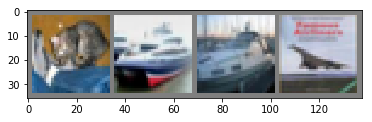

GroundTruth:    cat  ship  ship plane


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship  ship


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 67 %
Accuracy of  bird : 29 %
Accuracy of   cat : 25 %
Accuracy of  deer : 44 %
Accuracy of   dog : 65 %
Accuracy of  frog : 58 %
Accuracy of horse : 64 %
Accuracy of  ship : 72 %
Accuracy of truck : 68 %


## Image Dynamic General

In [0]:

def compute_approximate_dynamic_images(dir_folder,source_type, lib, no_frames=0):
  images = []
  frame_count = 0
  if no_frames == 0:
    print('dynamic image with all frames...')
  else:
    print('dynamic image with: ',no_frames,' frames')
    
#   fig = plt.figure(figsize=(15,15))
  
  if source_type == 'images':
    files_fights = os.listdir(dir_folder)
    files_fights.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    for index,avi in enumerate(files_fights):
      if frame_count < no_frames:
        img_dir = str(dir_folder)+'/'+avi
        
#         img = cv2.imread(img_dir,cv2.IMREAD_COLOR)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.open(img_dir).convert("RGB")
        img = np.array(img) 
    
        images.append(img)
        frame_count += 1
#   elif source_type == 'video':
#     cap = cv2.VideoCapture(dir_folder)
#     while(True):
#       if frame_count < no_frames:
#         # Capture frame-by-frame
#         if lib == 'cv2':
#           ret, frame = cap.read()
#           img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         elif lib == 'pil':
        
#         images.append(img)
#         frame_count += 1
#       else: break


  images = np.stack(images, axis=0)

  fw = np.zeros(no_frames)  
  for i in range(no_frames): #frame by frame
    fw[i] = np.sum( np.divide((2*np.arange(i+1,no_frames+1)-no_frames-1) , np.arange(i+1,no_frames+1))  )

  fwr = fw.reshape(no_frames,1,1,1)
  sm = images*fwr
  sm = sm.sum(0)

  sm = sm - np.min(sm) 
  sm = 255 * sm /np.max(sm) 
  img = sm.astype(np.uint8)
  
#   print('Dynamic img type: ',type(img))
#   imgPIL = Image.fromarray(img)
#   imgPIL.show()
  return sm, img

def plot_dynamic_image(dy_img):
  img = sm.astype(np.uint8)
  plt.imshow(img)
  plt.show()
  return img

dynamic image with:  20  frames


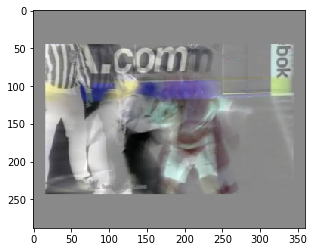

In [0]:
sm, img = compute_approximate_dynamic_images('/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/Fights/3','images', 'cv2', no_frames=20)
plt.imshow(img)
plt.show()

In [0]:
imgPIL = Image.fromarray(np.uint8(sm))
# imgPIL.show()
imgPIL.save('/content/drive/My Drive/VIOLENCE DATASETS/pruebas/pil.jpg')

cv2.imwrite('/content/drive/My Drive/VIOLENCE DATASETS/pruebas/cv2.jpg',img)

# Apple = Image.open('/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/Fights/2/frame001.jpg')
# Apple.show()

True

In [0]:
### Generate N dynamic images from a set of frames

def dynamic_image(video_id, video_frames_folder, out_folder, numSeq):

  files_fights = os.listdir(video_frames_folder)
  files_fights.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
  total_frames = len(files_fights)
  
  sequences = [files_fights[x:x+numSeq] for x in range(0, total_frames, numSeq)]
  no_sequences = 0
  
  for index, seq in enumerate(sequences):
#     print('sequence : ', index)
    
    if len(seq)==numSeq:
      no_sequences = no_sequences + 1
#       print('no_sequences : ', no_sequences)
      frames = []
      for frame in seq:
        img_dir = str(video_frames_folder)+'/'+ frame
        img = cv2.imread(img_dir,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        frames.append(img)
 
      frames = np.stack(frames, axis=0)
      fw = np.zeros(numSeq)  
      for i in range(numSeq): #frame by frame
        fw[i] = np.sum( np.divide((2*np.arange(i+1,numSeq+1)-numSeq-1) , np.arange(i+1,numSeq+1))  )

      fwr = fw.reshape(numSeq,1,1,1)
      sm = frames*fwr
      sm = sm.sum(0)
      sm = sm - np.min(sm) ;
      sm = 255 * sm /np.max(sm) ;
      img = sm.astype(np.uint8)
      
#       plt.imshow(img)
#       plt.show()
      
      out_image_name = out_folder+'/'+'video'+str(video_id)+'-segment'+str(index)+'.jpg'
      print(out_image_name)
      status = cv2.imwrite(out_image_name,img)
      
      if status == False: 
        print('ERROR guardando imagen dinamica...')
#         return -1
  return no_sequences

In [0]:
no_sequences = dynamic_image(2,'/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/Fights/2','/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia', 4)
no_sequences

/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment0.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment1.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment2.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment3.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment4.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment5.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment6.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment7.jpg
/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia/video2-segment8.jpg
/content/drive/My D

10

## Using Pre-trained CNN

In [0]:
# dir(models)

# Top level data directory. Here we assume the format of the directory conforms
#   to the ImageFolder structure
data_dir = "./data/hymenoptera_data"

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "alexnet"

# Number of classes in the dataset
num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for
num_epochs = 15

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

input_size = 224

In [0]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [0]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

## Violence Model

In [0]:

class ViolenceModel(nn.Module):
  def __init__(self, seqLen):
      super(ViolenceModel, self).__init__()
      self.seqLen = seqLen
      self.alexnet = models.alexnet(pretrained=True)
      
      set_parameter_requires_grad(self.alexnet, feature_extract)
      
      self.convNet = nn.Sequential(*list(self.alexnet.features.children()))
      self.linear = nn.Linear(256*6*6*seqLen,2)
#       model_ft.classifier[6] = nn.Linear(256*6*6*seqLen,num_classes)
      self.alexnet = None

  def forward(self, x):
    lista = []
    for dimage in range(0, self.seqLen):
      feature = self.convNet(x[dimage])
#       print('--->feature  (CNN output) size: ',feature.size())
      feature = feature.view(feature.size(0), 256 * 6 * 6)
      lista.append(feature)
#       print('--->feature VIEW (CNN output) size: ',feature.size())
      
    x = torch.cat(lista, dim=1)  
#     print('x cat: ',x.size())
    x = self.linear(x)
    
#     print('x classifier: ',x.size())
    
#       print('feature (CNN output)size: ',feature.size())
        
    return x

In [0]:

lista = []
for i in range(5):
  x = torch.randn(1, 5)
  print(x)
  lista.append(x)

tensor([[-1.3850, -1.2034,  0.5761,  1.5218, -3.1416]])
tensor([[-1.6252, -0.7897,  0.3818, -1.2194, -0.3751]])
tensor([[-1.7649, -0.5887, -0.3962, -0.2167, -1.2001]])
tensor([[ 0.3267,  1.6414, -1.3855,  0.9795, -1.1927]])
tensor([[ 0.3628, -0.5179, -1.0474, -0.0660, -0.9343]])


In [0]:
aa = torch.cat(lista,dim=1)
aa.size()
aa

tensor([[-1.3850, -1.2034,  0.5761,  1.5218, -3.1416, -1.6252, -0.7897,  0.3818,
         -1.2194, -0.3751, -1.7649, -0.5887, -0.3962, -0.2167, -1.2001,  0.3267,
          1.6414, -1.3855,  0.9795, -1.1927,  0.3628, -0.5179, -1.0474, -0.0660,
         -0.9343]])

## Gnerate Static Dynamic Images Dataset

In [0]:
def make_split(fights_dir, noFights_dir, seqLen):

  path_violence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/violencia'
  n_violent_images = 0 
  for target in sorted(os.listdir(fights_dir)):
      d = os.path.join(fights_dir, target)
      if not os.path.isdir(d):
          continue
#       print(d)
      n = dynamic_image(target,d,path_violence, seqLen)
       
  path_noviolence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas/noViolencia'
  n_no_violent_images = 0
  for target in sorted(os.listdir(noFights_dir)):
      d = os.path.join(noFights_dir, target)
      if not os.path.isdir(d):
          continue
      n = dynamic_image(target,d,path_noviolence, seqLen)



In [0]:
#### Generar imagenes dinamicas y guardar
# Dataset, Labels, NumFrames = make_split('/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/Fights','/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/noFights',4)

In [0]:
# path_violence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas20/violencia'
# path_noviolence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/ImagenesDinamicas20/noViolencia'
# datasetAll, labelsAll = createDataset(path_violence,path_noviolence)

In [0]:
# len(labelsAll), len(datasetAll)
# Dataset
# type(Labels)

(2000, 2000)

## Generar dataset

In [0]:
def createDataset(path_violence,path_noviolence):
  imagesF = []

  list_violence = os.listdir(path_violence)
  list_violence.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

  for target in list_violence:
      d = os.path.join(path_violence, target)
  #     print(d)
  #     if not os.path.isdir(d):
  #         continue
      imagesF.append(d)


  imagesNoF = []
  list_no_violence = os.listdir(path_noviolence)
  list_no_violence.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

  for target in list_no_violence:
      d = os.path.join(path_noviolence, target)
#       print(d)
  #     if not os.path.isdir(d):
  #         continue
      imagesNoF.append(d)

  Dataset = imagesF + imagesNoF
  Labels = list([1] * len(imagesF)) + list([0] * len(imagesNoF))
  NumFrames = [len(glob.glob1(Dataset[i], "*.jpg")) for i in range(len(Dataset))]
  return Dataset, Labels, NumFrames

## Violence Dataset from images

In [0]:
class ViolenceDatasetImages(Dataset):
  
  def __init__(self, dataset, labels, spatial_transform):
    """
    Args:
        dataset (list): Paths to the videos.
        labels (list): Directory with all the images.
        
        spatial_transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.spatial_transform = spatial_transform
    self.images = dataset
    self.labels = labels
#     self.numFrames = numFrames
#     self.seqLen = seqLen

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    vid_name = self.images[idx]
    label = self.labels[idx]
    img = Image.open(vid_name)
    img = self.spatial_transform(img.convert('RGB'))
    return img,label

#       for i in np.linspace(1, numFrames, self.seqLen):
#           fl_name = vid_name + '/' + 'frame' + str(int(round(i))).zfill(3) + '.jpg'
#           img = Image.open(fl_name)
#           inpSeq.append(self.spatial_transform(img.convert('RGB')))
#       inpSeq = torch.stack(inpSeq, 0)
    return inpSeq, label

## Violence Dataset from Videos

In [0]:
class ViolenceDatasetVideos(Dataset):
  
  def __init__(self, dataset, labels, spatial_transform, seqLen):
    """
    Args:
        dataset (list): Paths to the videos.
        labels (list): labels froma data
        seqLen (int): Number of frames in each segment
        
        spatial_transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.spatial_transform = spatial_transform
    self.images = dataset
    self.labels = labels
    self.seqLen = seqLen

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    vid_name = self.images[idx]
    label = self.labels[idx]
    
    frames_list = os.listdir(vid_name)
    frames_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    total_frames = len(frames_list)
    
    sequences = [frames_list[x:x+seqLen] for x in range(0, total_frames, seqLen)]
    
    inpSeq = []
    
    for index, seq in enumerate(sequences):
      if len(seq)==self.seqLen:
        frames = []
        for frame in seq:
          img_dir = str(vid_name)+'/'+ frame
          
#           img = cv2.imread(img_dir,cv2.IMREAD_COLOR)
#           img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = Image.open(img_dir).convert("RGB")
          img = np.array(img) 
          frames.append(img)

        frames = np.stack(frames, axis=0)
        fw = np.zeros(self.seqLen)  
        for i in range(self.seqLen): #frame by frame
          fw[i] = np.sum( np.divide((2*np.arange(i+1,self.seqLen+1)-self.seqLen-1) , np.arange(i+1,self.seqLen+1))  )

        fwr = fw.reshape(self.seqLen,1,1,1)
        sm = frames*fwr
        sm = sm.sum(0)
        sm = sm - np.min(sm) ;
        sm = 255 * sm /np.max(sm) ;
        img = sm.astype(np.uint8)
        ##to PIL image
        img = Image.fromarray(np.uint8(img))
        
        inpSeq.append(self.spatial_transform(img.convert('RGB')))
    
    inpSeq = torch.stack(inpSeq, 0)
   
    return inpSeq,label
  
  
  

In [0]:

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Detect if we have a GPU available

### Test Loader and dimentions

In [0]:
### test Violence Dataset and Loaders
path_violence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/Fights'
path_noviolence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/noFights'

datasetAll, labelsAll, numFramesAll = createDataset(path_violence,path_noviolence)

seqLen = 20

image_datasets = {
  'train':ViolenceDatasetVideos(datasetAll,labelsAll,data_transforms['train'],seqLen),
#   'val': ViolenceDatasetVideos(dataset_test,dataset_test_labels,data_transforms['val'],seqLen)
}
dataloaders_dict = {
  'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
#   'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=True, num_workers=4)
}

model = ViolenceModel(2)

# optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
model.train() 
model.cuda()




for inputs, labels in dataloaders_dict['train']:
#   print('inputs size: ',inputs.size())
#   print('labels size: ',labels.size())
#   inputs = inputs.to(device)
#   labels = labels.to(device)
#   optimizer.zero_grad()
  
#   with torch.set_grad_enabled(True):
  print('type inputs: ', type(inputs))
  print('size inputs: ', inputs.size())
  
  
  inputVariable1 = Variable(inputs.permute(1, 0, 2, 3, 4).cuda())
  print('type inputVariable1: ', type(inputVariable1))
  print('size inputVariable1: ', inputVariable1.size())
  
  outputs = model(inputVariable1)
  
  
#    for t in range(0, seqLen):
  


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f68b8e59e10>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f68b8e59e10>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", 

type inputs:  <class 'torch.Tensor'>
size inputs:  torch.Size([8, 2, 3, 224, 224])
type inputVariable1:  <class 'torch.Tensor'>
size inputVariable1:  torch.Size([2, 8, 3, 224, 224])
//// Xx:  torch.Size([8, 2])
type inputs:  <class 'torch.Tensor'>
size inputs:  torch.Size([8, 2, 3, 224, 224])
type inputVariable1:  <class 'torch.Tensor'>
size inputVariable1:  torch.Size([2, 8, 3, 224, 224])
//// Xx:  torch.Size([8, 2])
type inputs:  <class 'torch.Tensor'>
size inputs:  torch.Size([8, 2, 3, 224, 224])
type inputVariable1:  <class 'torch.Tensor'>
size inputVariable1:  torch.Size([2, 8, 3, 224, 224])
//// Xx:  torch.Size([8, 2])
type inputs:  <class 'torch.Tensor'>
size inputs:  torch.Size([8, 2, 3, 224, 224])
type inputVariable1:  <class 'torch.Tensor'>
size inputVariable1:  torch.Size([2, 8, 3, 224, 224])
//// Xx:  torch.Size([8, 2])
type inputs:  <class 'torch.Tensor'>
size inputs:  torch.Size([8, 2, 3, 224, 224])
type inputVariable1:  <class 'torch.Tensor'>
size inputVariable1:  torch.

KeyboardInterrupt: ignored

In [0]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                
                inputs = inputs.permute(1, 0, 2, 3, 4)
                inputs = inputs.to(device)
#                 inputVariable1 = Variable(inputs.permute(1, 0, 2, 3, 4).to(device))
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [0]:

path_violence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/Fights'
path_noviolence = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/noFights'

datasetAll, labelsAll, numFramesAll = createDataset(path_violence,path_noviolence)

len(datasetAll), len(labelsAll), len(numFramesAll)

(1000, 1000, 1000)

In [0]:
# Send the model to GPU
# model_ft = model_ft.to(device)
""" Alexnet
"""
model = None
model = ViolenceModel(2)
# set_parameter_requires_grad(model, feature_extract)

model.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 linear.weight
	 linear.bias


In [0]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()


In [32]:
from kfolds import *
from operator import itemgetter 
import time
import copy

seqLen = 20

for train_idx, test_idx in k_folds(n_splits = 5, subjects = len(datasetAll)):
  dataset_train = list(itemgetter(*train_idx)(datasetAll)) 
  dataset_train_labels =  list(itemgetter(*train_idx)(labelsAll)) 
  
  dataset_test = list(itemgetter(*test_idx)(datasetAll)) 
  dataset_test_labels =  list(itemgetter(*test_idx)(labelsAll))
  
  image_datasets = {
    'train':ViolenceDatasetVideos(dataset_train,dataset_train_labels,data_transforms['train'],seqLen),
    'val': ViolenceDatasetVideos(dataset_test,dataset_test_labels,data_transforms['val'],seqLen)
  }
  dataloaders_dict = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=True, num_workers=4)
  }
  
  # Train and evaluate
  model, hist = train_model(model, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=False)

  
#   print('train_idx',len(train_idx))
#   print(train_idx)
#   print('test_idx',len(test_idx))
#   print(test_idx)

Epoch 0/14
----------
train Loss: 0.3684 Acc: 0.8287
val Loss: 1.2324 Acc: 0.6500

Epoch 1/14
----------
train Loss: 0.3910 Acc: 0.8688
val Loss: 1.0439 Acc: 0.7100

Epoch 2/14
----------
train Loss: 0.3186 Acc: 0.8925
val Loss: 0.1082 Acc: 0.9800

Epoch 3/14
----------
train Loss: 0.2119 Acc: 0.9250
val Loss: 0.3618 Acc: 0.9100

Epoch 4/14
----------
train Loss: 0.2940 Acc: 0.8975
val Loss: 0.2939 Acc: 0.9300

Epoch 5/14
----------
train Loss: 0.2864 Acc: 0.9125
val Loss: 0.3038 Acc: 0.9500

Epoch 6/14
----------
train Loss: 0.3160 Acc: 0.9100
val Loss: 0.2650 Acc: 0.9450

Epoch 7/14
----------
train Loss: 0.2334 Acc: 0.9275
val Loss: 0.1833 Acc: 0.9750

Epoch 8/14
----------
train Loss: 0.2662 Acc: 0.9175
val Loss: 0.5157 Acc: 0.9200

Epoch 9/14
----------
train Loss: 0.2028 Acc: 0.9413
val Loss: 1.0253 Acc: 0.8150

Epoch 10/14
----------
train Loss: 0.1926 Acc: 0.9400
val Loss: 0.4897 Acc: 0.9250

Epoch 11/14
----------
train Loss: 0.2674 Acc: 0.9225
val Loss: 0.5509 Acc: 0.9050

Ep

In [0]:
# load additional module
import pickle

# define a list of places
# placesList = ['Berlin', 'Cape Town', 'Sydney', 'Moscow']
data_file = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/history.txt'
with open(data_file, 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(hist, filehandle)

In [34]:
with open(data_file, 'rb') as filehandle:
    # read the data as binary data stream
    hist2 = pickle.load(filehandle)

print(type(hist2))
print(hist2)    

<class 'list'>
[tensor(0.9950, device='cuda:0', dtype=torch.float64), tensor(0.9950, device='cuda:0', dtype=torch.float64), tensor(0.9300, device='cuda:0', dtype=torch.float64), tensor(0.9950, device='cuda:0', dtype=torch.float64), tensor(0.8950, device='cuda:0', dtype=torch.float64), tensor(0.9950, device='cuda:0', dtype=torch.float64), tensor(0.9700, device='cuda:0', dtype=torch.float64), tensor(0.9900, device='cuda:0', dtype=torch.float64), tensor(0.9250, device='cuda:0', dtype=torch.float64), tensor(0.9500, device='cuda:0', dtype=torch.float64), tensor(0.9650, device='cuda:0', dtype=torch.float64), tensor(0.9050, device='cuda:0', dtype=torch.float64), tensor(0.9900, device='cuda:0', dtype=torch.float64), tensor(0.9900, device='cuda:0', dtype=torch.float64), tensor(0.8400, device='cuda:0', dtype=torch.float64)]


In [4]:
# !pip install visdom
# from visdom import Visdom
! npm install -g localtunnel
get_ipython().system_raw('/usr/local/bin/python -m pip install visdom')
get_ipython().system_raw('/usr/local/bin/python -m visdom.server -port 6006 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')
import time
time.sleep(5)
! cat url.txt
import visdom
time.sleep(5)
vis = visdom.Visdom(port='6006')
print(vis)
time.sleep(3)
vis.text('testing')
! cat visdomlog.txt


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.2
added 55 packages from 34 contributors in 6.675s
your url is: https://weak-dingo-28.localtunnel.me


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.6/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.6/http/client.py", line 1239, in request
    self._send_request(method, url, body, headers, encode_chunked)
 

Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.6/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.6/http/client.py", line 1239, in request
    self._send_request(method, url, body, headers, encode_chunked)
 

/usr/bin/python2: No module named visdom


dynamic image with:  4  frames
Dynamic image shape:  (288, 360, 3)


Text(0.5, 1.0, 'Dynamic')

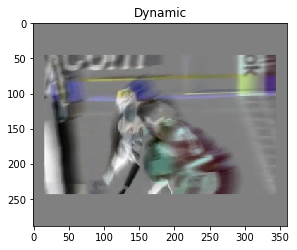

In [0]:
images_folder = '/content/drive/My Drive/VIOLENCE DATASETS/HockeyFightsFrames/Fights/2'
sm, img = compute_approximate_dynamic_images(images_folder,'images', no_frames=4)


fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img)
a.set_title('Dynamic')



# plt.imshow(np.asarray(img_t))
# a = fig.add_subplot(1, 3, 2)
# imgplot = plt.imshow(np.asarray(img_t))
# a.set_title('transform')

In [0]:


# PILimage = Image.fromarray(img.astype('uint8'), 'RGB')
PILimage = Image.fromarray(img, 'RGB')
# print('PIL img size',PILimage.size)
img_t = transform(PILimage)
batch_t = torch.unsqueeze(img_t, 0)
print('batch_t size',batch_t.size())
# PILimage.show()
# print('transform size: ',img_t.size())

# tensor_image = img_t.view(img_t.shape[1], img_t.shape[2], img_t.shape[0])
# print(type(tensor_image), tensor_image.shape)

# transformIMG = img_t.permute(1, 2, 0)
# transformIMG.size()
# plt.imshow(transformIMG)

batch_t size torch.Size([1, 3, 224, 224])
